# Housing Market - Linear Regression Analysis

### Eric Au

### The Business Problem: 

The King County Housing Authority (KCHA) wants to look into building a new community of family homes in King County (located in Washington State and near Seattle). Along with the King Contractors (KC), the KCHA needs a better idea on what metrics influence the sale price of a home. KCHA and KC would like to bring on engineers and architects to assist with the development of these homes but need to understand how cost of designing a home. 

**The intention is to develop a sale price algorithm to help set a target price for a new housing development in King County.** 

 - The main purpose of this algorithm is predictive, meaning that the model should be able to take in attributes of a home that does not yet have a set price, and to predict a sale price for that home. 
 

 - We will also take a look at the model's attributes and explain possible relationships between the attributes of a home and its price. 

Other issues to consider:
- KCHA would also like to set aside percentage development of homes for low-income affordable housing. KCHA have defined a home to qualify for affordable housing if it sells for less than $300,000 (RESEARCH AND CONFIRM THIS). What type of home build would best accomodate low income housing?


**Stakeholders:** The King County Housing Authority (KCHA), King Contractors (KC), prospective architects and engineers. 



## 1. Initial Dataset Assessment

### Library Imports

In [23]:
# Basic imports
from IPython.display import Markdown, display
import numpy as np
import pandas as pd
# Data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# Pre-Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### What does the data look like?
Lets first load in the data set for housing data in King County and then perform some initial glimpses into the dataset. 

In [24]:
# load in dataset
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


For further reference in this project, the following markdown file was also provided to give context and description to the columns. 

In [25]:
# load in the markdown file for column names and descriptions
display(Markdown("data/column_names.md"))

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [26]:
print('We have', df.shape[0], 'rows and', df.shape[1], 'columns in our dataset.')

We have 21597 rows and 21 columns in our dataset.


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

First we notice that there are missing values for the following columns: `waterfront`, `view`, and `yr_renovated`. 

Additionally, we have mainly float or integer type columns with several columns that are categorical variables and are classified as object types (6 total). I may also want to change the `date` to a datetime datatype moving forward. 

In [28]:
# how many missing values? 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [29]:
# summary statistics
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


These are a few things we can take from this. Some that stand out: 

- The maximum amount of bedrooms is 33! This seems very high, unless we are talking about a mansion? Maybe this represents the total amount of bedrooms for an apartment complex?


- The range for floors is between 1-3.5 floors. Can a building floor be designated by 0.5 increments? Typically no, but can examine closer. 


- Possible outliers in `sqft_living` as the max value is 13,540 SF. 


- The range for the `yr_built` is between 1900 and 2015. Additionally, there are likely many 0 values for `yr_renovated`; this could mean that the home was never renovated and a value of 0 was placed instead. 

## 2. Data Preprocessing & Cleaning

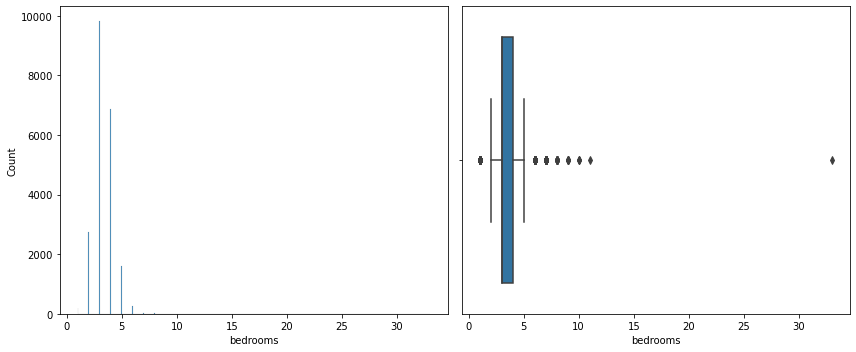

In [30]:
# look at the distribution of bedrooms column visually
# set up 3 columns of figs for bedrooms column
fig, axs = plt.subplots(figsize = (12,5), ncols=2)

# plot histogram 
sns.histplot(df['bedrooms'], ax=axs[0])

# visualize as a boxplot
sns.boxplot(df['bedrooms'], ax=axs[1])


plt.tight_layout()
plt.show()

In [31]:
# what are our possible outliers? 
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

## 3. Initial Linear Regression Model (Price as the Target)

### Initial Assessments

## 4. Multiple Linear Regression Model (Price as the Target)